In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine()

X = wine_data["data"]
y = wine_data["target"]

In [2]:
from sklearn import preprocessing
X_std = preprocessing.scale(X)

In [3]:
from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)
pca_wine_fit = pca_wine.fit(X_std).transform(X_std)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], ['Class1','Classs2','Class3']):
    plt.scatter(
        pca_wine_fit[y == i, 0], pca_wine_fit[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Wine dataset")

plt.show()


In [4]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pca_wine_fit)

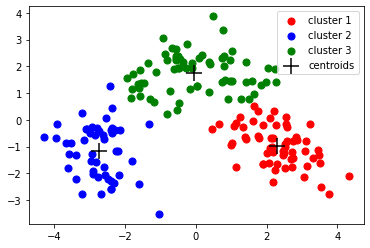

In [9]:
import matplotlib.pyplot as plt
# plot the 3 clusters
plt.scatter(
    pca_wine_fit[y_km == 0, 0], pca_wine_fit[y_km == 0, 1],
    s=50, c='red', label='cluster 1'
)

plt.scatter(
    pca_wine_fit[y_km == 1, 0], pca_wine_fit[y_km == 1, 1],
    s=50, c='blue', label='cluster 2'
)

plt.scatter(
    pca_wine_fit[y_km == 2, 0], pca_wine_fit[y_km == 2, 1],
    s=50, c='green', label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='+',
    c='black', label='centroids'
)
plt.legend(loc="best", shadow=False,scatterpoints=1)
plt.show()